In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.set(font_scale=1.3)
np.random.seed(42)
np.set_printoptions(precision=6)
plt.rcParams["figure.figsize"] = (10,6)

### 1. Wygenerowanie danych

In [2]:
from sklearn.datasets import make_regression

In [3]:
data, target = make_regression(n_samples=200, n_features=1, noise=20)
target = target ** 2

print (f'{data[:5]}\n')
print (target[:5])

[[ 1.852278]
 [ 0.473592]
 [-1.230864]
 [ 0.625667]
 [-0.07201 ]]

[18795.440426  3481.301662  5866.345958  3697.116539    78.964854]


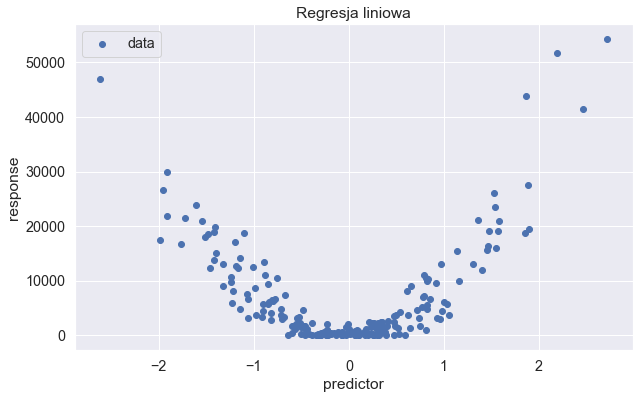

In [4]:
plt.title ('Regresja liniowa')
plt.scatter(data,target, label='data')
plt.xlabel('predictor')
plt.ylabel('response')
plt.legend();

### 2. Prosty model liniowy

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
reg = LinearRegression()
reg.fit(data, target)

print (f'Intercept: {reg.intercept_}')
print (f'Coef: {reg.coef_[0]}')

Intercept: 6974.449761739001
Coef: 989.7526254454262


#### - predict and score

In [7]:
prediction = reg.predict(data)

In [8]:
from sklearn.metrics import r2_score

In [9]:
r2_score(target, prediction)

0.009265932786992725

In [10]:
reg.score(data, target)

0.009265932786992725

#### - visualization

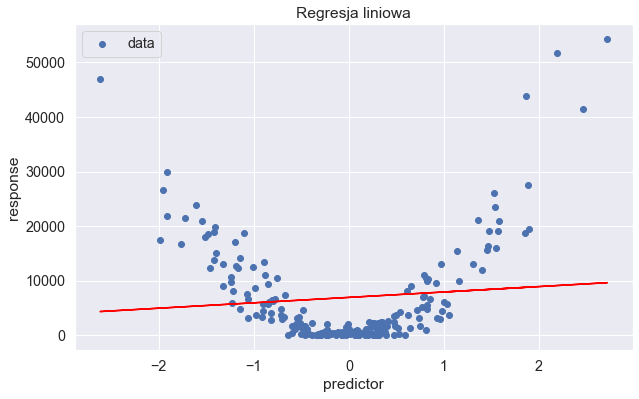

In [11]:
plt.title ('Regresja liniowa')
plt.scatter(data,target, label='data')
plt.plot(data, prediction, color='red')
plt.xlabel('predictor')
plt.ylabel('response')
plt.legend();

### 3. Regresja drzew decyzyjnych

- w poniższym przykładzie model jest przeuczony - za bardzo dopasowany do danych (brak przekazanych argumentów do funkcji)

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
reg_tree = DecisionTreeRegressor()
reg_tree.fit(data,target)

DecisionTreeRegressor()

In [14]:
plot_data = np.arange(-3,3,0.1).reshape(-1,1)

In [15]:
reg_tree_pred = reg_tree.predict(plot_data)

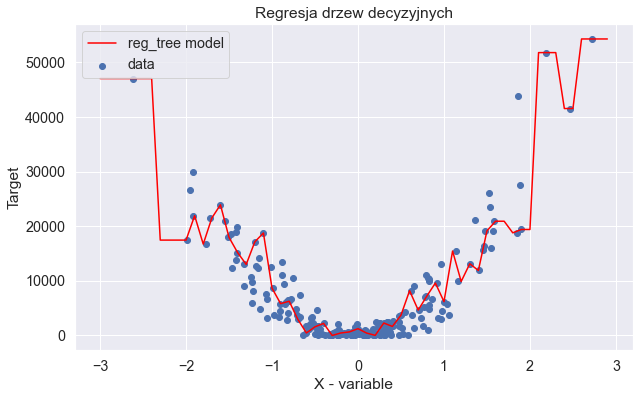

In [16]:
plt.title('Regresja drzew decyzyjnych')
plt.scatter(data,target, label='data')
plt.xlabel('X - variable')
plt.ylabel('Target')
plt.plot(plot_data, reg_tree_pred, label='reg_tree model', color='red')
plt.legend();

#### - parametr max_depth = 1

In [18]:
max_depth = 1
reg_tree = DecisionTreeRegressor(max_depth=max_depth)
reg_tree.fit(data,target)

DecisionTreeRegressor(max_depth=1)

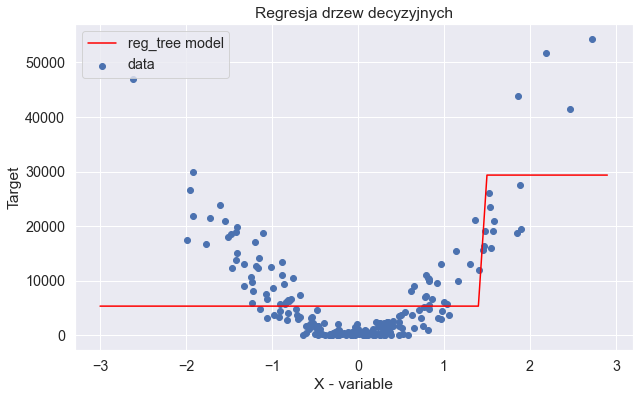

In [19]:
plt.title('Regresja drzew decyzyjnych')
plt.scatter(data,target, label='data')
plt.xlabel('X - variable')
plt.ylabel('Target')
plt.plot(plot_data, reg_tree.predict(plot_data), label='reg_tree model', color='red')
plt.legend();

#### - max_depth = 2

In [24]:
max_depth=2

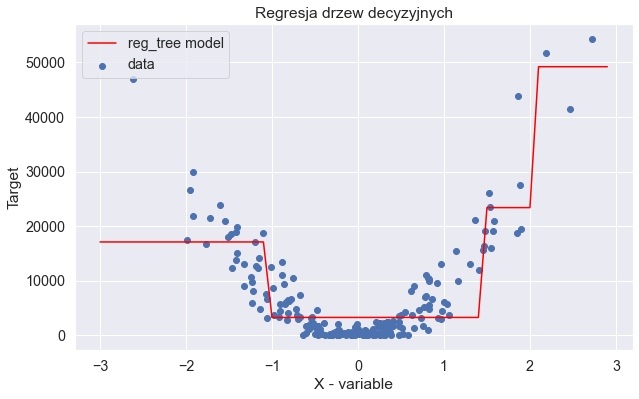

In [25]:
reg_tree = DecisionTreeRegressor(max_depth=max_depth)
reg_tree.fit(data,target)

plt.title('Regresja drzew decyzyjnych')
plt.scatter(data,target, label='data')
plt.xlabel('X - variable')
plt.ylabel('Target')
plt.plot(plot_data, reg_tree.predict(plot_data), label='reg_tree model', color='red')
plt.legend();

### 4. Graf drzewa decyzyjnego

In [36]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(reg_tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=['cecha x'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')


True

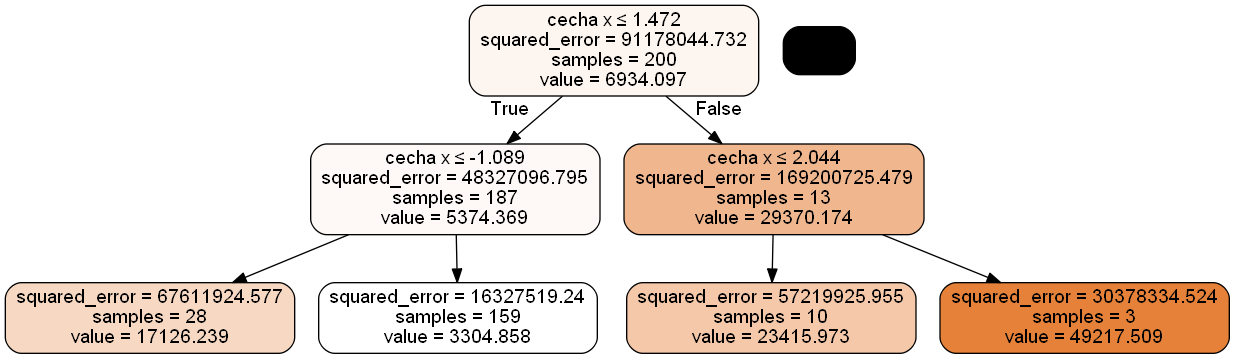

In [35]:
Image(graph.create_png())

### 5. Model regresji drzew decyzyjnych i  graf funckja

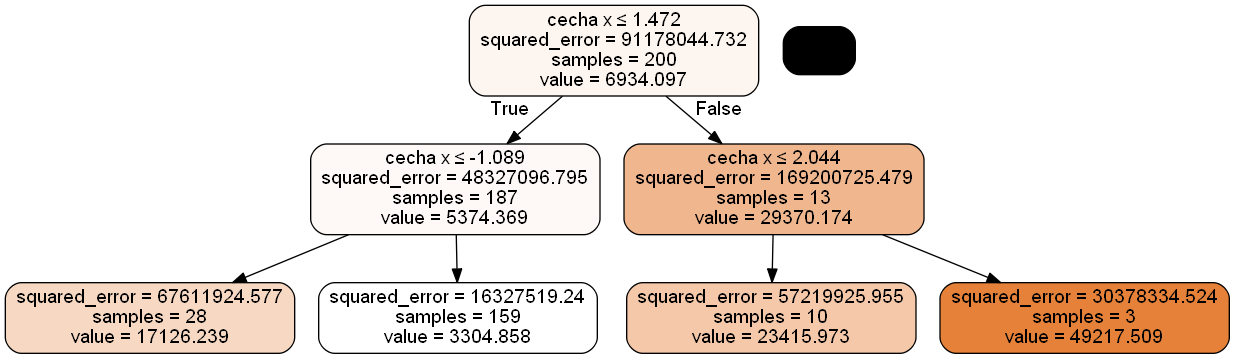

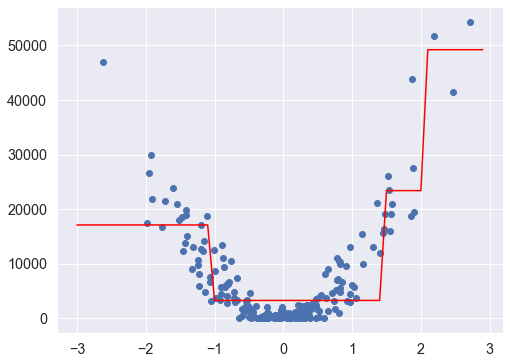

In [37]:
def make_dt_regression(max_depth=2):
    regressor = DecisionTreeRegressor(max_depth=max_depth)
    regressor.fit(data, target)

    plt.figure(figsize=(8, 6))
    plt.plot(plot_data, regressor.predict(plot_data), c='red')
    plt.scatter(data, target)

    dot_data = StringIO()
    export_graphviz(regressor, out_file=dot_data,
                   filled=True, rounded=True,
                   special_characters=True,
                   feature_names=['cecha x'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')

    return Image(graph.create_png(), width=300 + max_depth * 100)
    
make_dt_regression(max_depth=2)    

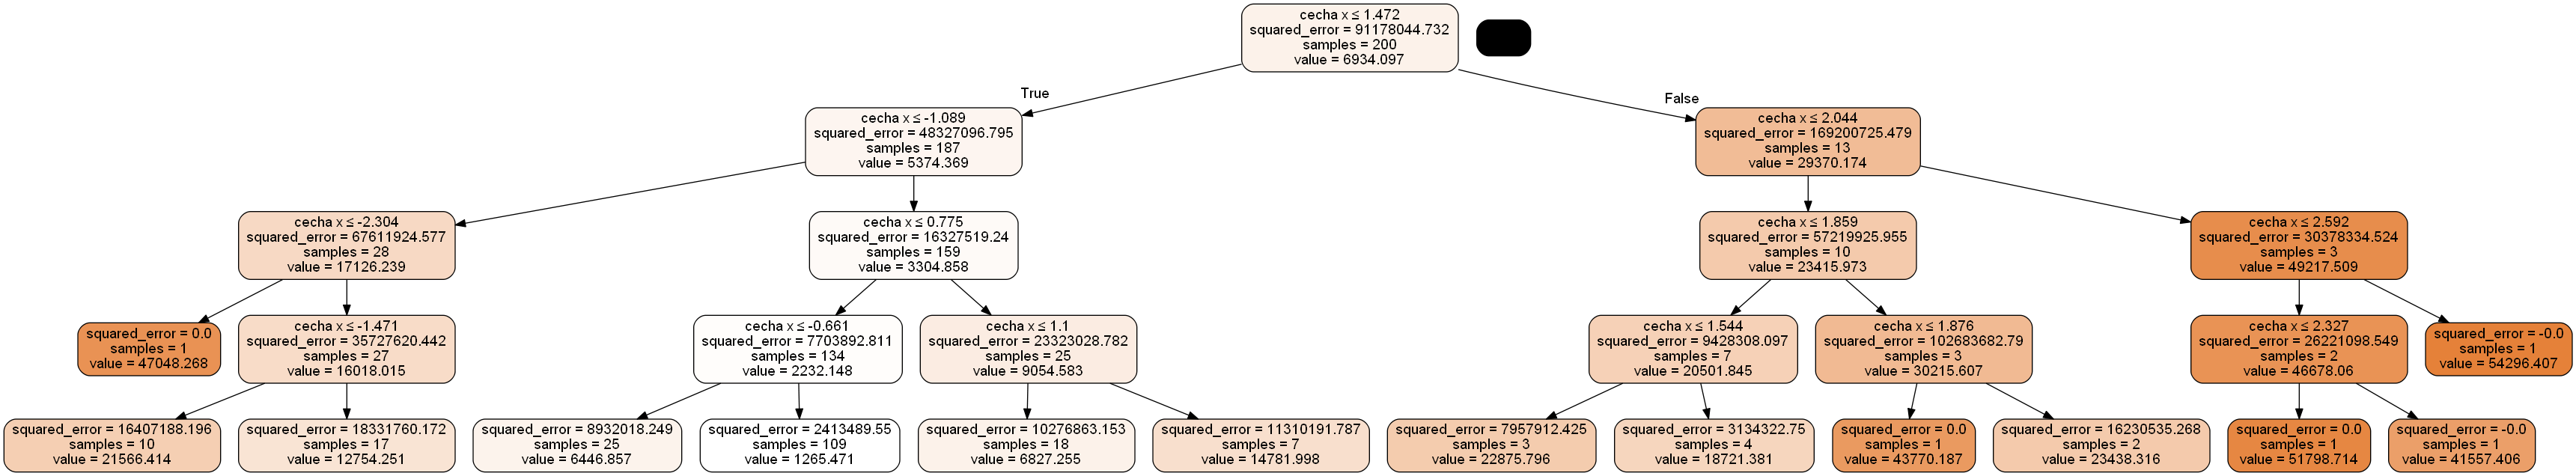

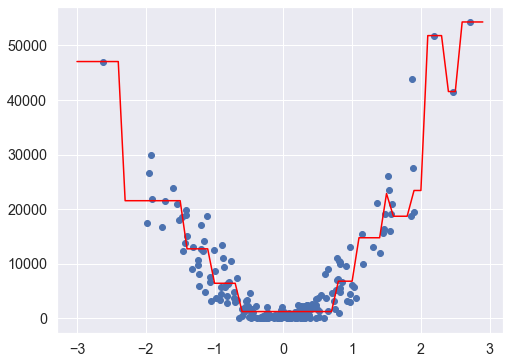

In [39]:
make_dt_regression (4)